In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

Text(0.5, 1.0, 'OXYGENE')

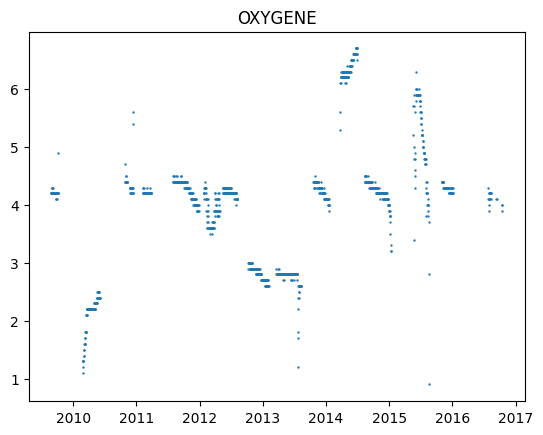

In [3]:
ox = pd.read_csv('oxygne-mll-tiahura.csv', sep= ';')
ox['DateTime'] = ox['DateTime'].astype('datetime64[ns]')
ox['DateTime'] = ox['DateTime'].dt.date
ox['mL/L'] = pd.to_numeric(ox['mL/L'].str.replace(',', '.'))
ox['mL/L'].astype('float')
plt.scatter(ox['DateTime'], ox['mL/L'], s = .5)
plt.title('OXYGENE')

Text(0.5, 1.0, 'CHLOROPHYLLE A')

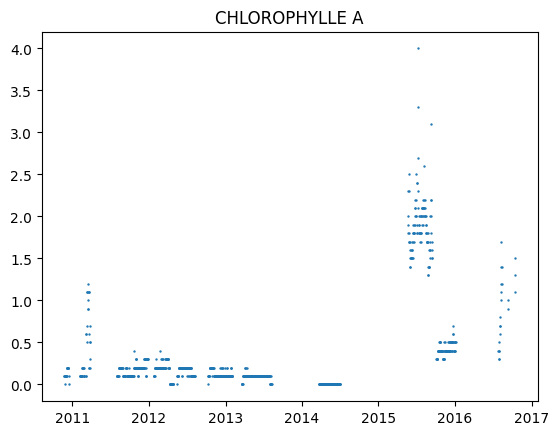

In [4]:
chloro = pd.read_csv('fluorimtrie-gl-tiahura.csv', sep= ';')
chloro['DateTime'] = chloro['DateTime'].astype('datetime64[ns]')
chloro['DateTime'] = chloro['DateTime'].dt.date
chloro['µg/L'] = pd.to_numeric(chloro['µg/L'].str.replace(',', '.'))
chloro['µg/L'].astype('float')
plt.scatter(chloro['DateTime'], chloro['µg/L'], s = .5)
plt.title('CHLOROPHYLLE A')

Text(0.5, 1.0, 'CONDUCTIVITÉ')

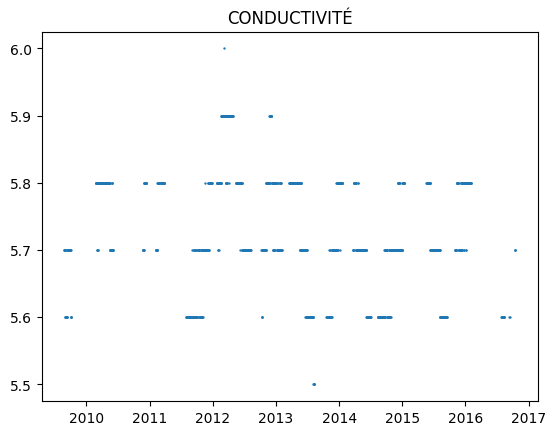

In [5]:
data = pd.read_csv('conductivit-sm-tiahura.csv', sep= ';')
data['DateTime'] = data['DateTime'].astype('datetime64[ns]')
data['DateTime'] = data['DateTime'].dt.date
data['S/m'] = pd.to_numeric(data['S/m'].str.replace(',', '.'))
data['S/m'].astype('float')
plt.scatter(data['DateTime'], data['S/m'], s = .5)
plt.title('CONDUCTIVITÉ')

Text(0.5, 1.0, 'SALINITÉ')

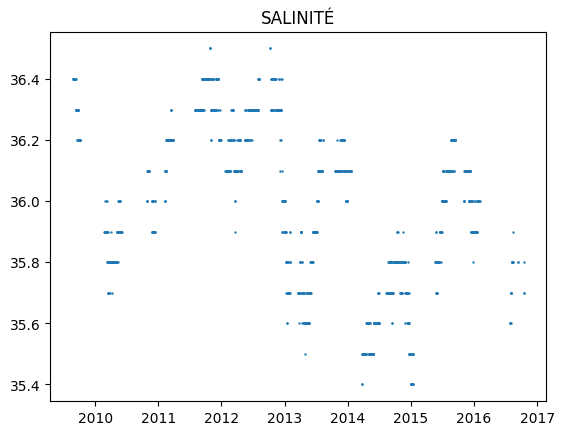

In [6]:
sal = pd.read_csv('salinit-tiahura.csv', sep= ';')
sal['DateTime'] = sal['DateTime'].astype('datetime64[ns]')
sal['DateTime'] = sal['DateTime'].dt.date
sal['PSU'] = pd.to_numeric(sal['PSU'].str.replace(',', '.'))
sal['PSU'].astype('float')
plt.scatter(sal['DateTime'], sal['PSU'], s = .5)
plt.title('SALINITÉ')

Text(0.5, 1.0, 'TEMPÉRATURE')

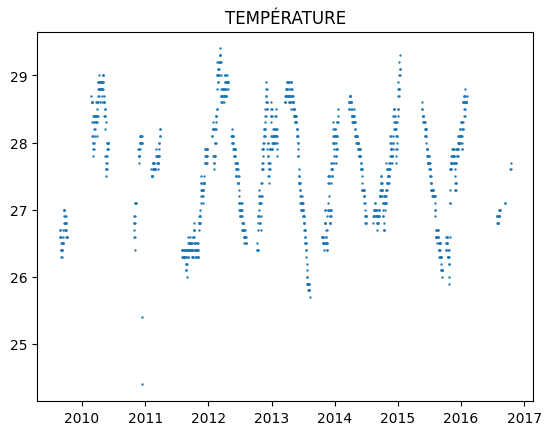

In [7]:
temp = pd.read_csv('temprature-c-tiahura.csv', sep= ';')
temp['DateTime'] = temp['DateTime'].astype('datetime64[ns]')
temp['DateTime'] = temp['DateTime'].dt.date
temp['°C'] = pd.to_numeric(temp['°C'].str.replace(',', '.'))
temp['°C'].astype('float')
plt.scatter(temp['DateTime'], temp['°C'], s = .5)
plt.title('TEMPÉRATURE')

Text(0.5, 1.0, 'PH')

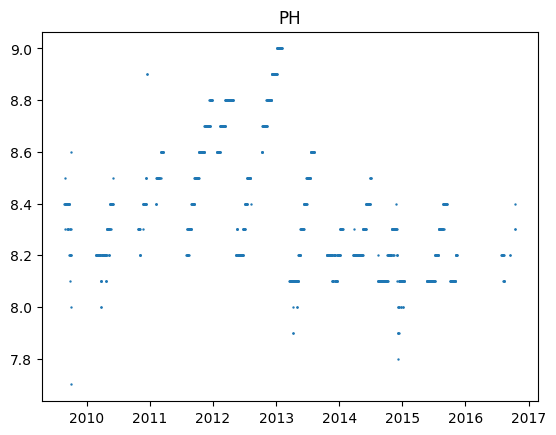

In [8]:
ph = pd.read_csv('ph-si-tiahura.csv', sep= ';')
ph['DateTime'] = ph['DateTime'].astype('datetime64[ns]')
ph['DateTime'] = ph['DateTime'].dt.date
ph['SI'] = pd.to_numeric(ph['SI'].str.replace(',', '.'))
ph['SI'].astype('float')
plt.scatter(ph['DateTime'], ph['SI'], s = .5)
plt.title('PH')

Text(0.5, 1.0, 'Turbidité')

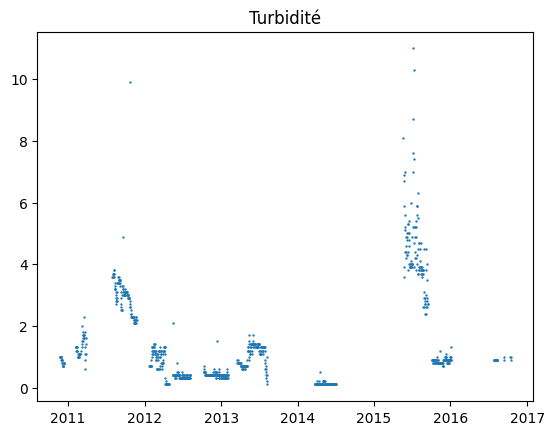

In [9]:
turbid = pd.read_csv('turbidit-ntu-tiahura.csv', sep= ';')
turbid['DateTime'] = turbid['DateTime'].astype('datetime64[ns]')
turbid['DateTime'] = turbid['DateTime'].dt.date
turbid['NTU'] = pd.to_numeric(turbid['NTU'].str.replace(',', '.'))
turbid['NTU'].astype('float')
plt.scatter(turbid['DateTime'], turbid['NTU'], s = .5)
plt.title('Turbidité')

In [10]:
multiparamètres = pd.merge(temp, ox, on = 'DateTime', how = 'inner')
multiparamètres = pd.merge(multiparamètres, chloro, on = 'DateTime', how = 'inner')
multiparamètres = pd.merge(multiparamètres, sal, on = 'DateTime', how = 'inner')
multiparamètres = pd.merge(multiparamètres, turbid, on = 'DateTime', how = 'inner')
multiparamètres = pd.merge(multiparamètres, ph, on = 'DateTime', how = 'inner')

In [11]:
multiparamètres

,DateTime,°C,mL/L,µg/L,PSU,NTU,SI
0,2010-11-23,27.9,4.3,0.1,36.0,1.0,8.4
1,2010-11-24,27.8,4.3,0.1,36.0,1.0,8.3
2,2010-11-25,27.9,4.2,0.1,36.0,1.0,8.4
3,2010-11-26,27.8,4.3,0.1,35.9,1.0,8.4
4,2010-11-27,27.7,4.3,0.0,35.9,1.0,8.4
...,...,...,...,...,...,...,...
838,2016-09-12,27.1,4.1,1.0,35.8,1.0,8.2
839,2016-09-13,27.1,4.1,0.9,35.8,0.9,8.2
840,2016-10-13,27.6,4.0,1.5,35.7,1.0,8.4
841,2016-10-14,27.6,4.0,1.3,35.7,1.0,8.3


In [12]:
# rééchantillonnage des données par mois en moyenne
multiparamètres = multiparamètres.set_index('DateTime')
multiparamètres.index = pd.to_datetime(multiparamètres.index)
# create a new column with the month and year, but as a datetime object
multiparamètres['month'] = multiparamètres.index.to_period('M').to_timestamp('M')
# group by the month and year, and then take the mean
multiparamètres = multiparamètres.groupby(['month']).mean()
multiparamètres = multiparamètres.reset_index()
# change the dates so that they are the first of the month
multiparamètres['month'] = multiparamètres['month'].values.astype('datetime64[M]')
# change 'month' to 'YearSeason' so that it's clear what it is
multiparamètres = multiparamètres.rename(columns={'month': 'YearSeason'})
multiparamètres

,YearSeason,°C,mL/L,µg/L,PSU,NTU,SI
0,2010-11-01,27.825000,4.250000,0.087500,35.950000,0.987500,8.387500
1,2010-12-01,27.778571,4.342857,0.164286,35.928571,0.785714,8.457143
2,2011-02-01,27.600000,4.213636,0.131818,36.140909,1.150000,8.486364
3,2011-03-01,27.760000,4.206667,0.806667,36.220000,1.640000,8.593333
4,2011-08-01,26.303226,4.416129,0.164516,36.300000,3.332258,8.274194
5,2011-09-01,26.426667,4.406667,0.123333,36.353333,3.166667,8.446667
6,2011-10-01,26.454839,4.345161,0.148387,36.403226,3.083871,8.564516
7,2011-11-01,26.900000,4.175000,0.191667,36.320833,2.225000,8.645833
8,2012-01-01,28.137500,4.237500,0.137500,36.100000,0.700000,8.600000
9,2012-02-01,28.389655,3.893103,0.210345,36.148276,1.131034,8.662069


In [13]:
# export the dataframe as a csv
multiparamètres.to_csv('multiparamètres.csv', index=False)